# Initial Data Report

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
import seaborn as sns
import missingno as msno
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

#for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer #for missing data values
from imblearn.over_sampling import SMOTE #to normally distribute the data

#computing resources
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB

#hyperparmeter tuning
from sklearn.datasets import make_classification
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

#testings
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score, precision_score, recall_score

# Loading Dataset

In [2]:
df = pd.read_csv("MobilePrice.csv")

## Describe Data

In [3]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
df.shape

(2000, 21)

In [6]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## Check data Validity

### Check Missing Data

In [11]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No Missing Data in the dataframe

### Check unique

In [15]:
{column: len(df[column].unique()) for column in df.columns}

{'battery_power': 1094,
 'blue': 2,
 'clock_speed': 26,
 'dual_sim': 2,
 'fc': 20,
 'four_g': 2,
 'int_memory': 63,
 'm_dep': 10,
 'mobile_wt': 121,
 'n_cores': 8,
 'pc': 21,
 'px_height': 1137,
 'px_width': 1109,
 'ram': 1562,
 'sc_h': 15,
 'sc_w': 19,
 'talk_time': 19,
 'three_g': 2,
 'touch_screen': 2,
 'wifi': 2,
 'price_range': 4}

## Training

In [16]:
y = df['price_range']
x =df.drop(['price_range'], axis=1)

In [17]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [18]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [25]:
def preprocess_inputs(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train),index=X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns = X_test.columns)
    return X_train, X_test, y_train, y_test

In [26]:
X_train,X_test, y_train, y_test = preprocess_inputs(x,y)

In [27]:
X_train.shape

(1600, 20)

In [28]:
X_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03
mean,2.016443e-16,8.895662e-17,-4.064804e-16,3.570755e-16,4.440892e-17,-1.016548e-16,-1.623701e-16,5.478257e-16,1.960931e-16,-1.562812e-16,-1.103978e-16,-9.811596e-17,-1.522393e-16,7.940155e-17,-1.652845e-16,-1.174061e-16,-8.311060e-17,3.504141e-17,-5.120904e-17,2.773476e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-1.679133e+00,-9.814225e-01,-1.236230e+00,-1.030464e+00,-9.935611e-01,-1.046060e+00,-1.664149e+00,-1.403674e+00,-1.716351e+00,-1.547446e+00,-1.642804e+00,-1.446732e+00,-1.736440e+00,-1.719897e+00,-1.717388e+00,-1.315416e+00,-1.626742e+00,-1.794892e+00,-1.010051e+00,-9.975031e-01
25%,-8.824736e-01,-9.814225e-01,-1.022798e+00,-1.030464e+00,-7.630365e-01,-1.046060e+00,-8.944732e-01,-1.054989e+00,-8.954521e-01,-6.737997e-01,-8.112676e-01,-8.179388e-01,-8.694853e-01,-8.361749e-01,-7.659267e-01,-8.543214e-01,-9.002645e-01,5.571367e-01,-1.010051e+00,-9.975031e-01
50%,-2.226278e-02,-9.814225e-01,-1.661722e-02,9.704368e-01,-3.019872e-01,9.559684e-01,1.264467e-02,-8.935045e-03,1.036739e-02,-2.369765e-01,2.026870e-02,-2.014972e-01,-1.759842e-02,-5.212318e-03,-5.233040e-02,-1.626798e-01,7.832335e-03,5.571367e-01,9.900495e-01,-9.975031e-01
75%,8.583753e-01,1.018929e+00,8.676019e-01,9.704368e-01,6.201112e-01,9.559684e-01,8.647857e-01,1.037119e+00,8.595732e-01,1.073493e+00,8.518049e-01,6.765671e-01,8.742750e-01,8.569895e-01,8.991314e-01,7.595088e-01,9.159292e-01,5.571367e-01,9.900495e-01,1.002503e+00
max,1.718586e+00,1.018929e+00,1.812802e+00,9.704368e-01,3.386407e+00,9.559684e-01,1.744415e+00,1.734488e+00,1.680472e+00,1.510316e+00,1.683341e+00,2.954818e+00,1.736014e+00,1.741869e+00,1.612728e+00,2.834433e+00,1.642407e+00,5.571367e-01,9.900495e-01,1.002503e+00


# Modelling Technique

In [31]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Linear SVC": LinearSVC(),
    "Naive Bayes" : GaussianNB()
}

In [32]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name+ " trained.")

Random Forest trained.
Linear SVC trained.
Naive Bayes trained.


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [33]:
results = []
for name, model in models.items():
    result = model.score(X_test,y_test)
    results.append(result)
    print(name+ ": {:.2f}%".format(result*100))

Random Forest: 86.50%
Linear SVC: 87.50%
Naive Bayes: 79.75%


In [34]:
def metricsmodel(y_test,y_predh):
    
    print("Precision = {:.2f}".format(precision_score(y_test, y_predh)))
    print("Recall = {:.2f}".format(recall_score(y_test, y_predh)))
    print("F1 Score Macro = {:.2f}".format(f1_score(y_test, y_predh, average = 'macro')))
    print("AUC = {:.2f}".format(roc_auc_score(y_test, y_predh)))
    print("-----------------------------------------------------------")

In [38]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test,y_pred))

Random Forest
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       105
           1       0.83      0.82      0.83        91
           2       0.76      0.79      0.78        92
           3       0.92      0.87      0.89       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.87       400

Linear SVC
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       105
           1       0.80      0.69      0.74        91
           2       0.74      0.76      0.75        92
           3       0.95      1.00      0.97       112

    accuracy                           0.88       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.88      0.87       400

Naive Bayes
              precision    recall  f1-score   support

           0       0.90      0.90     

### Random Forest has better precision

In [47]:
def cm_plot(y_test,y_pred,model):
    cm = confusion_matrix(y_test, y_pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

Random Forest Classification


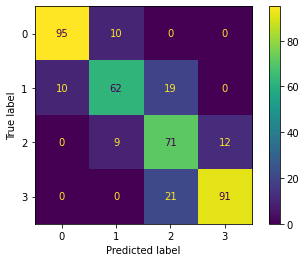

In [49]:
print('Random Forest Classification')
cm_plot(y_test,y_pred,model)